#### Gradient Descent

Jay Urbain
12/10/2018

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is an optimization algorithm used to find the local minimum of a function. It is commonly used in many different machine learning algorithms. 

Complete the code for the following functions below:   
- dLdw1() # partial derivative of the loss (cost) with respect to w1
- dLdw0() # partial derivative of the loss (cost) with respect to w0
- f() # linear regression prediction function
- cost() # cost function   

Note: plots

In [2]:
# loading necessary libraries and setting up plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generate plots within notebook
%matplotlib inline

In [3]:
# Read dataset into a Pandas dataframe
f = "ex1data1.txt"
df = pd.read_csv(f, header=None, names=["X","Y"])

# verify
print(df.shape)
print(df.head())

# Convert pandas columns for X, Y into numpy arrays for processing
X=df.iloc[:,0].values
Y=df.iloc[:,1].values

print(type(X))
print(X.shape)
print(X.shape[0])
print(X[:5])
print(Y[:5])

(97, 2)
        X        Y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
<class 'numpy.ndarray'>
(97,)
97
[6.1101 5.5277 8.5186 7.0032 5.8598]
[17.592   9.1302 13.662  11.854   6.8233]


#### Hyperparameter settings

In [4]:
# default settings, you need to determine optimal convergence settings
alpha = 0.01;   # learning rate
tol = 1e-11;    # tolerance to determine convergence
maxiter = 1000; # maximum number of iterations (in case convergence is not reached)
dispiter = 10;   # interval for displaying results during iterations

# track interations
iters = 0;
# parameter initialization
w0 = 0;
w1 = 0;

In [5]:
# track results for plotting parameter convergence
w0plot = [0.0]*(maxiter+1);
w1plot = [0.0]*(maxiter+1);
tplot  = [0]*(maxiter+1);
cplot  = [0]*(maxiter+1);

w0plot[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

#### Generate a scatter plot with labels and title to visualize the data

Plot X as a function of Y.

Text(0, 0.5, 'Y')

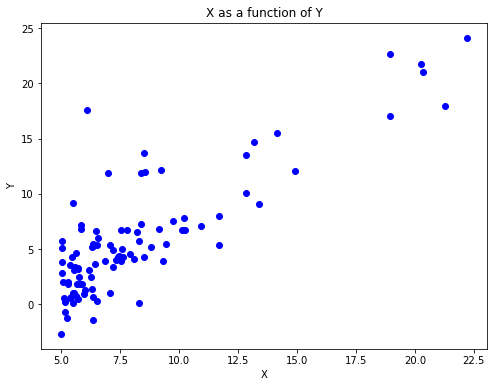

In [7]:
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(X, Y, color="blue")
# Add a title.
ax.set_title("X as a function of Y")
# Add axis labels.
ax.set_xlabel("X")
ax.set_ylabel("Y")

#### Functions you need to complete !!!

In [ ]:
# linear regression predictive function
def f(x):
    ##################### 
    # fill this in

    #####################
    
# partial derivative of the cost(loss) with respect to w1 (slogpe)
def dLdw1():
    ##################### 
    sum = 0
    m = X.size

    #####################
    
# partial derivative of the cost(loss) with respect to w0 (slogpe)
def dLdw0():
    ##################### 
    # fill this in
    sum = 0
    m = X.size
    

    #####################
    
def cost():
    ##################### 
    # fill this in
    sum = 0
    m = X.size

    #####################

#### Main training loop

In [ ]:
# main algorithm loop starts here
iters = 0
maxiters = 10
while True:
    # Note: need to implement dLdw1 and dLdw0 (above)
    delta1 = alpha * dLdw1()
    delta0 = alpha * dLdw0()

    # Store data for plotting convergence of parameters
    tplot[iters] = iters
    w0plot[iters] = w0
    w1plot[iters] = w1
    cplot[iters] = cost()
 
    iters+=1
    w1 = w1 - delta1
    w0 = w0 - delta0
 
    # display progress
    if iters % dispiter == 0:
        print(str(iters), ", w0=", str(w0), " delta0=", str(delta0), "w1=", str(w1), ", delta1=", str(delta1))

    if abs(delta1) <= tol or abs(delta0) <= tol or iters > maxiter:
        break

print("\nConvergence after " + str(iters) + " iterations: w0=" + str(w0) + ", w1=" + str(w1));

print(cplot)

#### Generate scatter plot with linear regression fit line

In [ ]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(X, Y, color="blue")
# Add a title.
ax.set_title("Data set with linear regression fit")
# Add axis labels.
ax.set_xlabel("X")
ax.set_ylabel("Y")
# Produce an image.
#fig.savefig("scatterplot.png")
ax.plot(X, w0+w1*X, color="red")

#### Plot convergence of data

In [ ]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.    
ax.plot(tplot, w0plot, color="blue", label="w0")
ax.plot(tplot, w1plot, color="red", label="w1")
# Add a title.
ax.set_title("Convergence of w0 and w1")
# Add axis labels.
ax.set_xlabel("Iterations")
ax.set_ylabel("Parameters")
ax.legend(loc='right')

#### Plot convergence of cost function

In [ ]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.    
ax.plot(tplot, cplot, color="blue", label="Cost")
# Add a title.
ax.set_title("Cost function trend")
# Add axis labels.
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.legend(loc='right')

Notice how the parameters and the cost function converge at different rates. We could also try terminating our gradient descent algorithm based on the cost function.